#       **************** Tweet classification ********

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Load the Data

In [2]:
train_set =  pd.read_csv("train.csv")
test_set  =  pd.read_csv("test.csv")

In [3]:
#Peek at the data
train_set.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [4]:
#Shape of the train set
train_set.shape

(6525, 3)

In [5]:
#Train_set information
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


#  🔎EDA : Exploratory Data Analysis

In [6]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
from textblob import Word
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

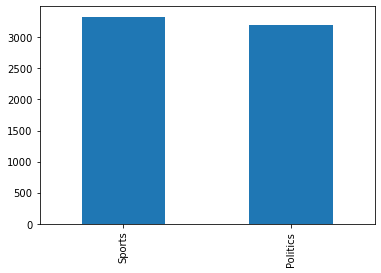

In [7]:
# Check the distriution of complaints by category
#train_set['Label'].value_counts().plot(kind='bar')
train_set['Label'].value_counts()

plt.figure()
train_set['Label'].value_counts().plot(kind='bar')
plt.show()

Our classe distribution is almost balanced!

In [8]:
#Counting all words in out train_set tweets
words = []
for value in train_set.TweetText.str.split(' '):
     words.extend(value)

In [9]:
#Check the number of words in train_set tweets
len(words)

106980

In [10]:
#Compute the frequency of all words in the TweetText
frequency_dist = nltk.FreqDist(words)
frequency_dist

FreqDist({'the': 3819, 'to': 2495, 'of': 1909, 'in': 1818, 'a': 1376, 'for': 1310, 'and': 1213, 'on': 1103, 'is': 822, 'at': 760, ...})

In [11]:
#Sorted the frequency of words
sorted_frequency_dist =sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)
sorted_frequency_dist[:15]

['the',
 'to',
 'of',
 'in',
 'a',
 'for',
 'and',
 'on',
 'is',
 'at',
 "'RT",
 'with',
 '&amp;',
 'from',
 'by']

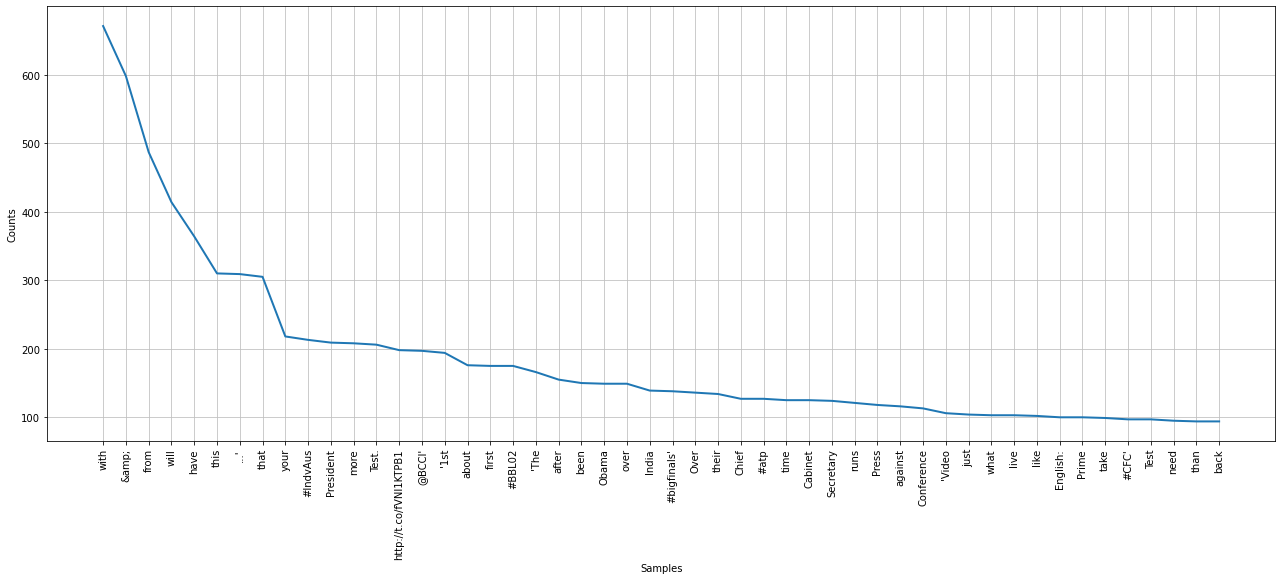

In [12]:
#Consider words with length greater than 3 and plot
plt.figure(figsize=(22,8))
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)

- From the graph above, we can clearly see that stop words like 'with','will','that'... appear a lot and some other undesirable patterns like word with hashtag, hyper links ...
- So we can infer that our tweets need a lot of preprocessing!

#### Building a  Word Cloud

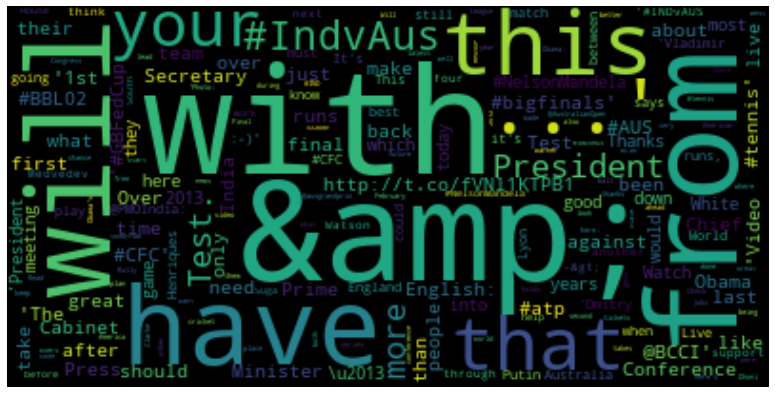

In [13]:
from wordcloud import WordCloud

wcloud = WordCloud().generate_from_frequencies(frequency_dist) #background_color="white"

plt.figure(figsize=(22,7))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

# 🛠Processing Text Data:

Preprocessing involves transforming raw text data into an understandable format, thereby any algorithms that are built on top of such data will add a value for the business. 
_To do so, this is how i proceeded:_
- I remove all irrelevent patterns appearing in my text data that can mislead our models like @User, #anyword, hyper links, numbers, RT (Retweet)...
- I remove punctuation because they can not add extra information or value. Hence the remove of all such instances will help to reduce the size of the data and computational efficiency.
- In order to have the text data in a uniform format and make sure that 'TWEET' and 'tweet' are treated as the same i perform lowercasing on my text data 
- I remove also Stop Words (common words like this, that, will,..) because they carry no meaning and then focusing on the important keywords instead
- Then i split text data into minimal meangful units (word tokenization) to perform lemmatizing which extracts a root word by considering the vocabulary

> 📌We can perform additionally to our text data pipeline:
- **Standardizing Text**: because there is a high chance of people using short and abbreviations to represent the same meaning.This may help the downstream process to easily understand and resolve the semantics of the text.
    - To do so we can create a custom lookup dictionary based on our data.
- **Correction Spelling**: because there is a high chance of people using short words and making typoerrors. This will help us reducing multiple copies of words which represent the same meaning.


In [14]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word

In [15]:
def cleantxt(tweets):
    
    #Remove patterns like @word
    tweets = re.sub(r'@[^\s]+','', tweets) 
    
    #Remove patterns like #word
    tweets = re.sub(r'#[^\s]+','', tweets)
    
    #Remove Punctuation 
    tweets = re.sub(r'[^\w\s]','', tweets) 
    
    #Remove RT
    tweets = re.sub(r'RT[\s]+','', tweets) 
    
    #Remove hyper links
    tweets = re.sub(r'https?:\/\/S+','', tweets) 
    
    #Removes unicode strings like "\u002c" and "x96"
    tweets = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', tweets) 
    tweets = re.sub(r'[^\x00-\x7f]',r'',tweets)    
    
    #Remove numbers
    tweets = "".join([i for i in tweets if not i.isdigit()]) 

    return tweets

In [16]:
#Apply cleanTxt function to both my train_set and test_set
train_set['TweetText'] = train_set['TweetText'].apply(cleantxt)
test_set['TweetText']  = test_set['TweetText'].apply(cleantxt)

In [17]:
#Peek at the data
train_set.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,The value of the and is measured not in dol...
1,304834304222064640,Politics,I fear so
2,303568995880144898,Sports,Watch video highlights of the final between A...
3,304366580664528896,Sports,At Nitro Circus at
4,296770931098009601,Sports,Always a good thing Thanks for the feedback


In [18]:
#Convert to LowerCase
train_set['TweetText'] = train_set['TweetText'].apply(lambda s:s.lower() if type(s) == str else s)
test_set['TweetText']  = test_set['TweetText'].apply(lambda s:s.lower() if type(s) == str else s)

#Remove Stop Words
stop = stopwords.words('english')
train_set['TweetText'] = train_set['TweetText'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test_set['TweetText']  = test_set['TweetText'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Tokenization
train_set['TweetText'] = train_set['TweetText'].apply(lambda x: x.split())
test_set['TweetText']  = test_set['TweetText'].apply(lambda x: x.split())

#Stemming
st = PorterStemmer()
train_set['TweetText'] = train_set['TweetText'].apply(lambda x: [st.stem(word) for word in x])
test_set['TweetText']  = test_set['TweetText'].apply(lambda x: [st.stem(word) for word in x])

In [19]:
#Peek at the data to make sure that our tweets are processed properly
train_set.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,"[valu, measur, dollar, term, deepest, american..."
1,304834304222064640,Politics,[fear]
2,303568995880144898,Sports,"[watch, video, highlight, final, australia, we..."
3,304366580664528896,Sports,"[nitro, circu]"
4,296770931098009601,Sports,"[alway, good, thing, thank, feedback]"


In [20]:
def join_tokens(tweet):
    return " ".join(tweet)

train_set['TweetText'] = train_set['TweetText'].apply(join_tokens)
test_set['TweetText']  = test_set['TweetText'].apply(join_tokens)

In [21]:
train_set.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,valu measur dollar term deepest american valu
1,304834304222064640,Politics,fear
2,303568995880144898,Sports,watch video highlight final australia west ind...
3,304366580664528896,Sports,nitro circu
4,296770931098009601,Sports,alway good thing thank feedback


In [22]:
test_set.head()

,TweetId,TweetText
0,306486520121012224,home side threaten mason bennett get end long ...
1,286353402605228032,thx ask see httptcoygjepjkf deriv seri abbrevi...
2,289531046037438464,construct along shore black sea httptcodvinwj
3,306451661403062273,remark meet foreign minist westerwel transcrip...
4,297941800658812928,begun ricki pont first player go hammer goe mu...


#### Encoding the target variable 

In [23]:
train_set['Label_encoding'] = train_set['Label'].map({'Politics':0, 'Sports':1})

In [24]:
#Separate dependent variable and independent variable
X = train_set['TweetText']
y = train_set['Label_encoding']

#### Split the data into train and test set

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
print('X_train shape', X_train.shape )
print('X_test shape' , X_test.shape )

X_train shape (5220,)
X_test shape (1305,)


# 🪄Modeling:


> - Machines are not capable of reading text in the same way as humans do. In order for a machine learning algorithm to determine patterns in text it must first be converted into a numeric structure. One of the most common techniques for this is called Bag of Words, or BoW.
- A BoW model splits the words in a piece of text into tokens disregarding grammar and word order. The model also counts the frequency in which a word occurs in the text, and assigns a weight proportional to this frequency. The output is a matrix of term frequencies where each row represents the text and each column a word in the vocabulary.
- To perform this type of modelling, i will use **CountVectoriser**
- CountVectoriser accomplishes the first two, splitting the words into tokens and counting the frequency. We can use another scikit-learn function called **TfidfTransformer** to apply the frequency weighting.


So the whole idea of having TF-IDF is to reflect on how important a word is to a document in a collection, and hence normalizing words appearing frequently in all the tweets 

> At this stage, having a matrix that contains weights of all our tweet words we can now train models and make predictions.

In [27]:
#Import the required libraries 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost  as xgb
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.metrics import confusion_matrix, classification_report, f1_score, classification_report, confusion_matrix


In [28]:
#Defining a dictionary that contains all my models to compare their scores

models_dict = {

'LR_model'  : make_pipeline(
                            CountVectorizer(stop_words='english'),
                            TfidfTransformer(norm='l2', sublinear_tf=True),
                            SGDClassifier(random_state=0, n_jobs=-1)),
'SVC_model' : make_pipeline(
                            CountVectorizer(stop_words='english'),
                            TfidfTransformer(norm='l2', sublinear_tf=True),
                            SVC(random_state=0)),
'KN_model'  : make_pipeline(
                            CountVectorizer(stop_words='english'),
                            TfidfTransformer(norm='l2', sublinear_tf=True),
                            KNeighborsClassifier(n_jobs=-1, n_neighbors=90)),
'RFC_model' : make_pipeline(
                            CountVectorizer(stop_words='english'),
                            TfidfTransformer(norm='l2', sublinear_tf=True),
                            RandomForestClassifier(random_state=0, n_jobs=-1)),
'XGB_model' : make_pipeline(
                            CountVectorizer(stop_words='english'),
                            TfidfTransformer(norm='l2', sublinear_tf=True),
                            xgb.XGBClassifier())

}

In [29]:
%%time

for mod_name, model in models_dict.items():
    model = model.fit(X_train, y_train)
    print('***'+ mod_name +'***')
    print('{}: Train score  {}'.format(mod_name, model.score(X_train, y_train)))
    print('{}: Test score   {}'.format(mod_name, model.score(X_test, y_test)))
    print('-----------------------------------------')

***LR_model***
LR_model: Train score  0.9888888888888889
LR_model: Test score   0.9149425287356322
-----------------------------------------
***SVC_model***
SVC_model: Train score  0.9925287356321839
SVC_model: Test score   0.924904214559387
-----------------------------------------
***KN_model***
KN_model: Train score  0.8718390804597701
KN_model: Test score   0.8689655172413793
-----------------------------------------
***RFC_model***
RFC_model: Train score  0.9940613026819923
RFC_model: Test score   0.8988505747126436
-----------------------------------------
***XGB_model***
XGB_model: Train score  0.910536398467433
XGB_model: Test score   0.8605363984674329
-----------------------------------------
CPU times: user 15 s, sys: 959 ms, total: 16 s
Wall time: 10.8 s


> Based on Test score SVM works the best for this dataset

In [30]:
SVC_model =  make_pipeline(CountVectorizer(stop_words='english'),TfidfTransformer(norm='l2', sublinear_tf=True),SVC(random_state=0))

## Tunning Hyperparameters:

Define two functions to tune hyperparameters, both return the model with the optimal combination:
- **GridSearch_CV**: performs a combination of hyperparameter tuning in order to determine the optimal combination values for a given model.It is fine when we are exploring relatively few combinations.
- **RandomizeSearchCV_**:Can be used in much the same way as the GridSearchCV, but instead of trying out all possible combinations ,it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.

In [31]:
def GridSearch_CV(model, param_grid):
    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    
    grid.fit(X_train, y_train)
    model_best_params = grid.best_estimator_
    
    print('best score :', grid.best_score_ )
    print('best params :', grid.best_params_ )
    
    return model_best_params


def RandomizeSearchCV_(model, param_grid) :
    
    randomSCV = RandomizedSearchCV(model, param_grid, n_iter=30, cv=5, scoring='accuracy', random_state=42)

    randomSCV.fit(X_train, y_train)
    model_best_params = randomSCV.best_estimator_
    
    print('best score :', randomSCV.best_score_ )
    print('best params :', randomSCV.best_params_ )
    
    return model_best_params

In [32]:
SVC_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'countvectorizer', 'tfidftransformer', 'svc', 'countvectorizer__analyzer', 'countvectorizer__binary', 'countvectorizer__decode_error', 'countvectorizer__dtype', 'countvectorizer__encoding', 'countvectorizer__input', 'countvectorizer__lowercase', 'countvectorizer__max_df', 'countvectorizer__max_features', 'countvectorizer__min_df', 'countvectorizer__ngram_range', 'countvectorizer__preprocessor', 'countvectorizer__stop_words', 'countvectorizer__strip_accents', 'countvectorizer__token_pattern', 'countvectorizer__tokenizer', 'countvectorizer__vocabulary', 'tfidftransformer__norm', 'tfidftransformer__smooth_idf', 'tfidftransformer__sublinear_tf', 'tfidftransformer__use_idf', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [45]:
# inialization of the Hyperparameters to tune
param_grid = {
    
    'svc__C':np.arange(1,2,0.1),
    'svc__kernel': ['rbf','poly'],
    'svc__coef0': np.arange(1,2,0.1),
    'svc__degree':np.arange(1,5,1)
}

#Tunning Hyperparameters
SVC_model_best_hyp = RandomizeSearchCV_(SVC_model, param_grid)

best score : 0.9204980842911878
best params : {'svc__kernel': 'rbf', 'svc__degree': 2, 'svc__coef0': 1.6000000000000005, 'svc__C': 1.7000000000000006}


In [46]:
#train the model
SVC_model_best_hyp.fit(X_train, y_train)

#Predict the X_test
y_pred = SVC_model_best_hyp.predict(X_test)

## 📈Evaluate the model

##### Classification report

In [47]:
print(classification_report(y_test, y_pred, target_names=('Politics', 'Sports')))

              precision    recall  f1-score   support

    Politics       0.93      0.90      0.92       620
      Sports       0.92      0.94      0.93       685

    accuracy                           0.92      1305
   macro avg       0.92      0.92      0.92      1305
weighted avg       0.92      0.92      0.92      1305



##### Confusion Matrix

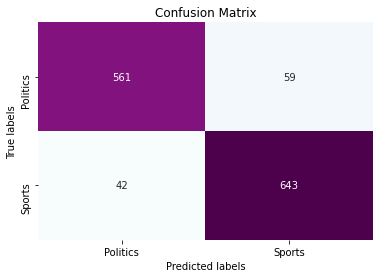

In [48]:
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='', cbar=False, ax=ax, cmap="BuPu")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Politics', 'Sports']); ax.yaxis.set_ticklabels(['Politics', 'Sports']);

# ⚡️Predict test data

In [49]:
test = test_set['TweetText']
test

0       home side threaten mason bennett get end long ...
1       thx ask see httptcoygjepjkf deriv seri abbrevi...
2           construct along shore black sea httptcodvinwj
3       remark meet foreign minist westerwel transcrip...
4       begun ricki pont first player go hammer goe mu...
                              ...                        
2605    qualifi elimin game play chidambaram stadium u...
2606    hi edward mission here list mission httptcoextadc
2607                                 perera first purchas
2608                     thank senat welcom charlottesvil
2609    here pictur offici pinterest account bill shan...
Name: TweetText, Length: 2610, dtype: object

In [50]:
def decoding_predictions(label):
    if label == 0:
        return 'Politics' 
    else:
        return 'Sports'

In [51]:
test_set['Label']=[decoding_predictions(label) for label in SVC_model_best_hyp.predict(test)]
test_set.drop('TweetText', axis=1, inplace=True)
submission = test_set

In [52]:
submission.head()

,TweetId,Label
0,306486520121012224,Sports
1,286353402605228032,Sports
2,289531046037438464,Politics
3,306451661403062273,Politics
4,297941800658812928,Sports


# 📝Submission

In [53]:
#Save the csv
filename = 'DeepTweets_final_V.csv'

submission.to_csv(filename, index=False)

print('Saved file: ' + filename)

Saved file: DeepTweets_final_V.csv


###  💡Suggestions to improve our model:

- 1. We can tune our model parameters, try different combinations to see if we can reach more in term of accuracy.
- 2. As i mentioned above, preprocessing spelling mistakes and standardize text can in someway boost our model performance.
- 3. When coverting text data into numeric data i have used techniques basically depend on apperance or frequency words. However, this methods are not able to capture the semantic relation between the words. This challenge is addressed by WordEmbedding. So we can either use a pre-trained model like word2vec or train from scratch our model wich it is a Shallow Neural Network if we have a huge amount of computing power.
- 4. As RNN are dedicated to handle sequence data and can reach state-of-the-art performance, and often it outperform other machine learning model.So we can train a LSTM (Long Short-Term Memory).
- 5. We can use LSTM along with word2vec to double boost our performance.
